In [19]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("segmentation data.csv")

In [9]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [10]:
df.drop(columns=['ID'],inplace=True)

In [11]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [12]:
df.shape

(2000, 7)

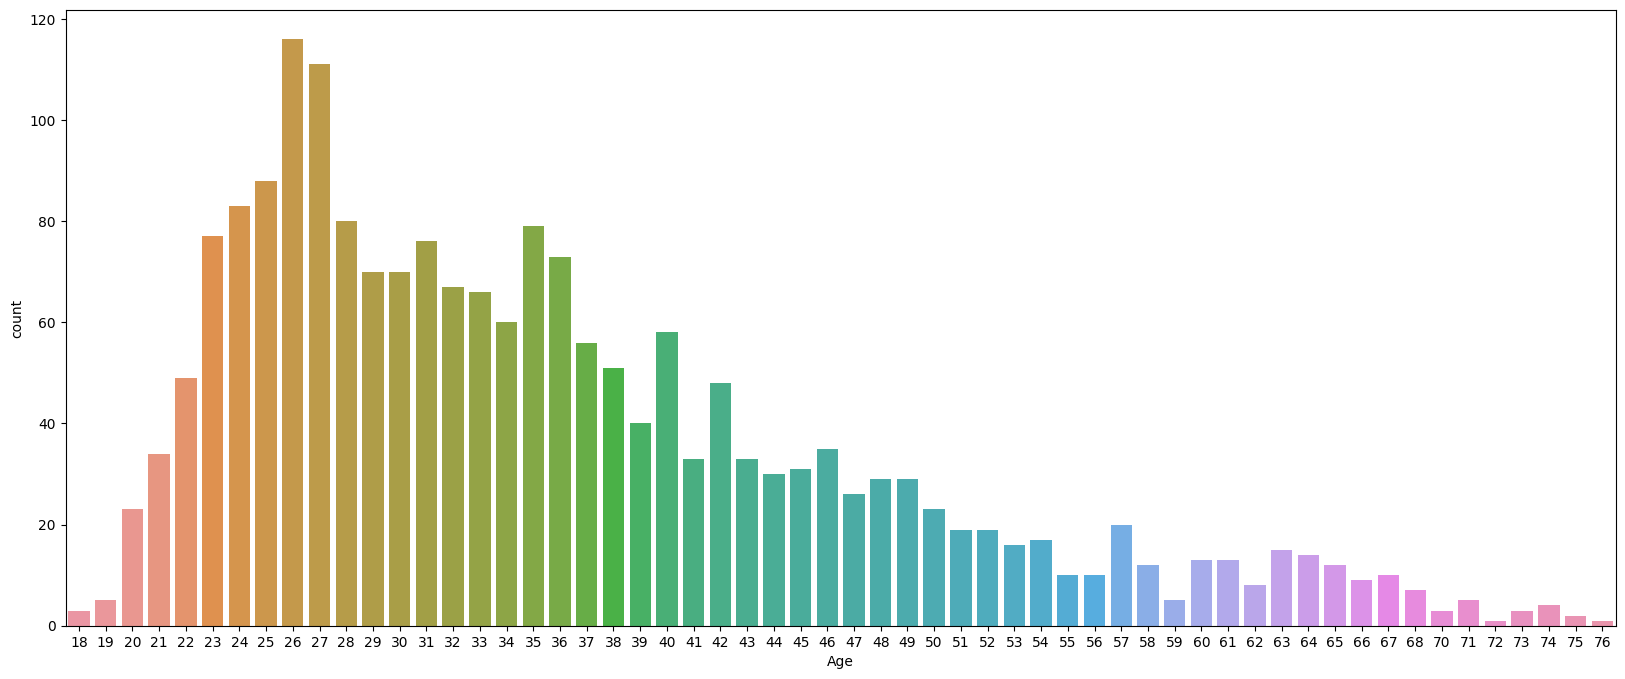

In [25]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='Age')
plt.show()

In [40]:
n_rows = 3
n_cols = 2

fig = make_subplots(rows=n_rows , cols=n_cols)
sex_counts=df['Sex'].value_counts().sort_values(ascending=True)
marital_counts=df['Marital status'].value_counts().sort_values(ascending=True)
education_counts =df['Education'].value_counts().sort_values(ascending=True)
occupation_counts=df['Occupation'].value_counts().sort_values(ascending=True)
settlement_counts=df['Settlement size'].value_counts().sort_values(ascending=True)
categorical_lst = [sex_counts,marital_counts,education_counts,occupation_counts,settlement_counts]
categorical_labels = ['Sex', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']

for i,col in enumerate(categorical_labels):
    fig.add_trace(
        go.Bar(
            x=categorical_lst[i].index.astype('str'),
            y=categorical_lst[i].values,
            name=col,
            text=np.round(categorical_lst[i].values,3),
            textposition='inside',
            marker_color=px.colors.sequential.Emrld,
            textfont=dict(size=10)),
        row=int(i/n_cols)+1, col=int(i%n_cols)+1
    )
    print(int(i/n_cols)+1,int(i%n_cols)+1)
fig.update_layout(
    height=800,
    title_text="Categorical Variable Distribution", 
    template='simple_white')
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()

1     914
0    1086
Name: Sex, dtype: int64
1 1
1 2
2 1
2 2
3 1


In [51]:
fig = make_subplots(rows=2, cols=2)
fig.add_trace(
    go.Histogram(x=df['Age'],name="Age Histogram",marker_color='darkgreen'),
    row=1,col=1
)
fig.add_trace(
    go.Box(x=df['Age'],name="Age Box",marker_color='darkgreen'),
    row=1,col=2
)
fig.add_trace(
    go.Histogram(x=df['Income'],name="Income Histogram",marker_color='darkgreen'),
    row=2,col=1
)
fig.add_trace(
    go.Box(x=df['Income'],name="Income Histogram",marker_color='darkgreen'),
    row=2,col=2
)
fig.update_layout(
    height=600,
    title_text="Continous Variable Distribution", 
    template='simple_white')
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()

### Gender and Education

In [70]:
education_colors=['#ACDF87', 'darkgreen', 'seagreen', '#68BB59']

gender_by_education = pd.DataFrame(df.groupby('Sex')['Education'].value_counts())
fig = make_subplots(rows=1,cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(labels=['Other/Unknown', 'High School', 'University', 'Graduate School'],
           values=[int(gender_by_education.loc[0,0]),int(gender_by_education.loc[0,1]),
                  int(gender_by_education.loc[0,2]),int(gender_by_education.loc[0,3])],
           textinfo='percent+label+value',
           name='Male',
           marker_colors=education_colors
          ),
    row=1,col=1
)
fig.add_trace(
    go.Pie(labels=['Other/Unknown', 'High School', 'University', 'Graduate School'],
           values=[int(gender_by_education.loc[1,0]),int(gender_by_education.loc[1,1]),
                  int(gender_by_education.loc[1,2]),int(gender_by_education.loc[1,3])],
           textinfo='percent+label+value',
           name='Female',
           marker_colors=education_colors
          ),
    row=1,col=2
)

fig.update_layout(
    height=600,
    title_text="Continous Variable Distribution", 
    template='simple_white',
     annotations=[dict(text='Male', x=0.18, y=0, font_size=20, showarrow=False),
                 dict(text='Female', x=0.84, y=0, font_size=20, showarrow=False)])
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()